# "Experimenting with the Hello World of CV and ML"
> "Applying regression, and classification techniques implemented from scratch to classify images of Handwritten Digits. MNIST Dataset is used for the training and testing purpose."

- toc: false
- branch: master
- badges: true
- comments: true
- categories: [notebook, project, python]
- image: images/vignette/digits.png
- hide: false
- search_exclude: true

# 1. Load MNIST data, libraries, functions and Plot first 20 images from the dataset:

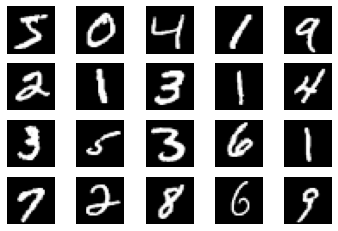

In [23]:
from tqdm.auto import tqdm
from kernel import *
from features import *
from softmax import *
from svm import *
from linear_regression import *
from utils import *
import sys
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
sys.path.append("..")

# load data
train_x, train_y, test_x, test_y = get_MNIST_data()
# Plot the first 20 images of the training set.
plot_images(train_x[0:20, :])

# 2. Linear Regression with Closed Form Solution

In [19]:
def run_linear_regression_on_MNIST(lambda_factor=1):
    """
    Trains linear regression, classifies test data, computes test error on test set

    Returns:
        Final test error
    """
    train_x, train_y, test_x, test_y = get_MNIST_data()
    train_x_bias = np.hstack([np.ones([train_x.shape[0], 1]), train_x])
    test_x_bias = np.hstack([np.ones([test_x.shape[0], 1]), test_x])
    theta = closed_form(train_x_bias, train_y, lambda_factor)
    test_error = compute_test_error_linear(test_x_bias, test_y, theta)
    return test_error


# Print test error using linear_regression: Closed Form Solution
L = np.around(np.linspace(1e-2, 1, 20), decimals=2)
print('Linear Regression test errors for different lambdas:')
loop = tqdm(enumerate(L), total=len(L), leave=False)
errors = []
for index, l in loop:
    loop.set_description(f"Lambda{index + 1}={l}")
    e = run_linear_regression_on_MNIST(l)
    errors.append(e)
    loop.set_postfix({'error': e})
print(tabulate(np.array([L[:10], errors[:10], L[10:], errors[10:]]).T, headers=(
    'lambda', 'error', 'lambda', 'error')))

Linear Regression test errors for different lambdas:


  lambda    error    lambda    error
--------  -------  --------  -------
    0.01   0.7702      0.53   0.7698
    0.06   0.7699      0.58   0.7697
    0.11   0.7696      0.64   0.7696
    0.17   0.7695      0.69   0.7696
    0.22   0.7696      0.74   0.7696
    0.27   0.7697      0.79   0.7696
    0.32   0.7697      0.84   0.7697
    0.37   0.7697      0.9    0.7697
    0.43   0.7698      0.95   0.7697
    0.48   0.7698      1      0.7697


In [20]:
###############################################################################
# 3. Support Vector Machine (One vs. Rest and Multiclass)
###############################################################################
def run_svm_one_vs_rest_on_MNIST():
    """
    Trains svm, classifies test data, computes test error on test set

    Returns:
        Test error for the binary svm
    """
    train_x, train_y, test_x, test_y = get_MNIST_data()
    # Image class = 0 or 1 (if 1-9)
    print("Running one vs. rest SVM")
    train_y[train_y != 0] = 1
    test_y[test_y != 0] = 1
    pred_test_y = one_vs_rest_svm(train_x, train_y, test_x)
    test_error = compute_test_error_svm(test_y, pred_test_y)
    return np.around(test_error, decimals=3)


print('SVM one vs. rest test error:', run_svm_one_vs_rest_on_MNIST())


def run_multiclass_svm_on_MNIST():
    """
    Trains svm, classifies test data, computes test error on test set

    Returns:
        Test error for the binary svm
    """
    train_x, train_y, test_x, test_y = get_MNIST_data()
    print("\nRunning multiclass SVM")
    pred_test_y = multi_class_svm(train_x, train_y, test_x)
    test_error = compute_test_error_svm(test_y, pred_test_y)
    return np.around(test_error, decimals=3)


print('Multiclass SVM test error:', run_multiclass_svm_on_MNIST())

Running one vs. rest SVM



SVM one vs. rest test error: 0.007

Running multiclass SVM



Multiclass SVM test error: 0.082


Running multinomial softmax classification


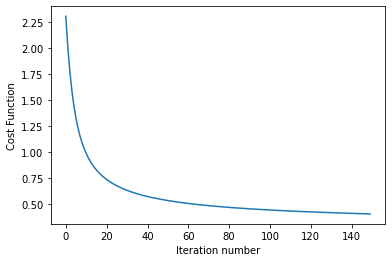

Softmax test error= 0.10050000000000003

Softmax test errors for different temperature parameters:


C:\Users\ashish\Work\ML-6.86x\Digit_Recognition\OneDigit\softmax.py:67: RuntimeWarning: divide by zero encountered in log
  non_regulized_cost = (- 1/N) * (np.sum(np.log(selected_prob)))


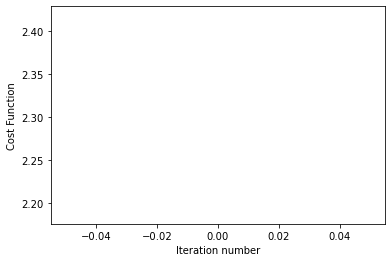

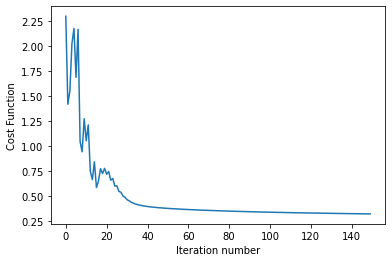

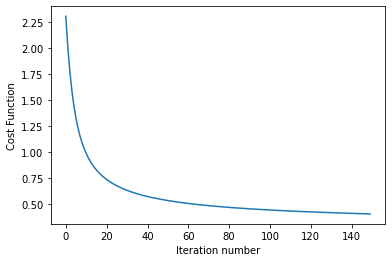

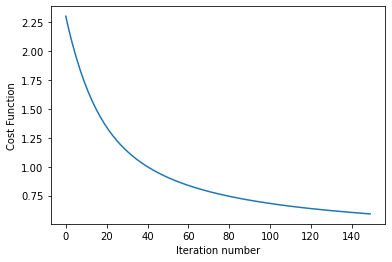

  temp    error
------  -------
  0.01   0.0853
  0.5    0.084
  1      0.1005
  2      0.1261


In [22]:
###############################################################################
# 4. Multinomial (Softmax) Regression and Gradient Descent
###############################################################################
def run_softmax_on_MNIST(temp_parameter=1):
    """
    Trains softmax, classifies test data, computes test error, and plots cost function

    Runs softmax_regression on the MNIST training set and computes the test error using
    the test set. It uses the following values for parameters:
    alpha = 0.3
    lambda = 1e-4
    num_iterations = 150

    Saves the final theta to ./theta.pkl.gz

    Returns:
        Final test error
    """
    train_x, train_y, test_x, test_y = get_MNIST_data()
    theta, cost_function_history = softmax_regression(
        train_x, train_y, temp_parameter, alpha=0.3, lambda_factor=1.0e-4, k=10, num_iterations=150)
    plot_cost_function_over_time(cost_function_history)
    test_error = compute_test_error(test_x, test_y, theta, temp_parameter)
    # Save the model parameters theta obtained from calling softmax_regression.
    write_pickle_data(theta, "./theta.pkl.gz")
    return test_error


print("Running multinomial softmax classification")
print('Softmax test error=', run_softmax_on_MNIST())
T = [0.01, .5, 1.0, 2.0]
errors = []
print('\nSoftmax test errors for different temperature parameters:')
pbr = tqdm(enumerate(T), leave=False, total=len(T))
for index, t in pbr:
    pbr.set_description(f"Temp Parameter Loop - {index+1}")
    errors.append(run_softmax_on_MNIST(t))
print(tabulate(np.array([T, errors]).T, headers=(
    'temp', 'error')))

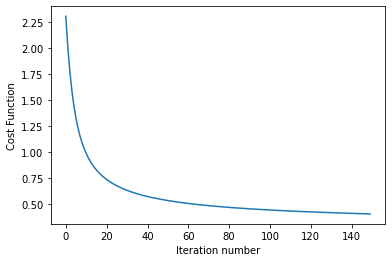


SoftMax % 3 test error= 0.10050000000000003


In [13]:
###############################################################################
# 5. Changing Labels
###############################################################################
def run_softmax_on_MNIST_mod3(temp_parameter=1):
    """
    Trains Softmax regression on digit (mod 3) classifications.

    See run_softmax_on_MNIST for more info.
    """
    train_x, train_y, test_x, test_y = get_MNIST_data()
    train_y, test_y = update_y(train_y, test_y)
    print("Running Softmax % 3")
    theta, cost_function_history = softmax_regression(
        train_x, train_y, temp_parameter, alpha=0.3, lambda_factor=1.0e-4, k=10, num_iterations=150)
    plot_cost_function_over_time(cost_function_history)
    test_error = compute_test_error_mod3(test_x, test_y, theta, temp_parameter)
    # Save the model parameters theta obtained from calling softmax_regression to disk.
    write_pickle_data(theta, "./theta_mod3.pkl.gz")
    return test_error


print('SoftMax % 3 test error=', run_softmax_on_MNIST_mod3())

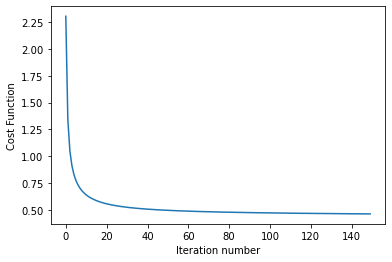



Softmax & PCA test error: 0.13859999999999995


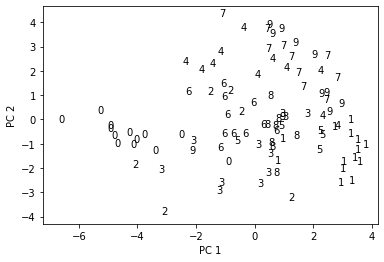

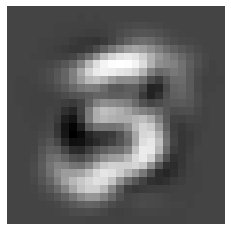

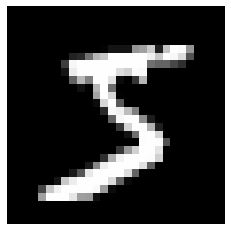

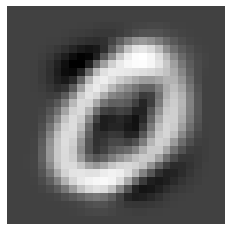

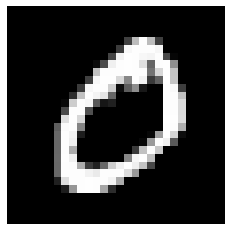

In [14]:
###############################################################################
# 6. Classification Using Manually Crafted Non-Linear Features
###############################################################################

##############################################
# 6-A. Dimensionality reduction via PCA
##############################################

print("Running classification using PCA")
n_components = 18
pcs = principal_components(train_x)
train_pca = project_onto_PC(train_x, pcs, n_components)
test_pca = project_onto_PC(test_x, pcs, n_components)
# train_pca (and test_pca) is a representation of our training (and test) data
# after projecting each example onto the first 18 principal components.

theta, cost_function_history = softmax_regression(
    train_pca, train_y, temp_parameter=0.5, alpha=0.3, lambda_factor=1.0e-4, k=10, num_iterations=150)
plot_cost_function_over_time(cost_function_history)
test_error = compute_test_error(test_pca, test_y, theta, temp_parameter=1)
# Save the model parameters theta obtained from calling softmax_regression to disk.
write_pickle_data(theta, "./theta_pca.pkl.gz")
print(f"Softmax & PCA test error: {test_error}")

# Plot first 100 images of the dataset as projected onto PC1 and PC2
plot_PC(train_x[range(100), ], pcs, train_y[range(100)])

# Use the reconstruct_PC function in features.py to show
# the first and second MNIST images as reconstructed solely from
# their 18-dimensional principal component representation.
# Compare the reconstructed images with the originals.
firstimage_reconstructed = reconstruct_PC(
    train_pca[0, ], pcs, n_components, train_x)
plot_images(firstimage_reconstructed)
plot_images(train_x[0, ])

secondimage_reconstructed = reconstruct_PC(
    train_pca[1, ], pcs, n_components, train_x)
plot_images(secondimage_reconstructed)
plot_images(train_x[1, ])

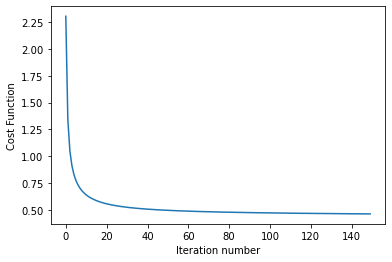



Softmax on Cubic features test error: 0.13859999999999995


In [15]:
##############################################
# 6-B. Cubic Kernel
##############################################

# 10-dimensional PCA representation of the training and test set

print("Running Softmax on cubic features and PCA")
n_components = 10
pcs = principal_components(train_x)
train_pca10 = project_onto_PC(train_x, pcs, n_components)
test_pca10 = project_onto_PC(test_x, pcs, n_components)

# Apply cubic feature transformation on the 10-D PCA train and test sets
# train_cube (and test_cube) is a representation of our training (and test) data
# after applying the cubic kernel feature mapping to the 10-dimensional PCA representations.

train_cube = cubic_features(train_pca10)
test_cube = cubic_features(test_pca10)

# Train the softmax regression model using (train_cube, train_y)
# and evaluate its accuracy on (test_cube, test_y).

theta, cost_function_history = softmax_regression(
    train_pca, train_y, temp_parameter=0.5, alpha=0.3, lambda_factor=1.0e-4, k=10, num_iterations=150)
plot_cost_function_over_time(cost_function_history)
test_error = compute_test_error(test_pca, test_y, theta, temp_parameter=1)
# Save the model parameters theta obtained from calling softmax_regression to disk.
write_pickle_data(theta, "./theta_cubic.pkl.gz")
print(f"Softmax on Cubic features test error: {test_error}")